In [97]:
import csv
from pathlib import Path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

path2data = Path.home()/'group'/'project'/'hfss_data'/'eigenmodes'/'230610_cavity_variations'
files = [path2data/'standard.eig', path2data/'smooth.eig',path2data/'resistive.eig',path2data/'grooved.eig']

def parse_eig(path):
    file_content=[]
    with open(path) as infile:
        reader = csv.reader(infile)
        for n, line in enumerate(reader):
            if n > 6:
                file_content.append([float(k) for k in re.findall(r'[\d.]+E-[\d.]+|[\d.]+', line[0])])
                
    return np.array(file_content)[:,(1,3)]


In [108]:
sns.set_theme(context='paper', style='whitegrid', font_scale=1.25,)
clist = sns.color_palette('bright', )

TypeError: set_theme() got an unexpected keyword argument 'sharex'

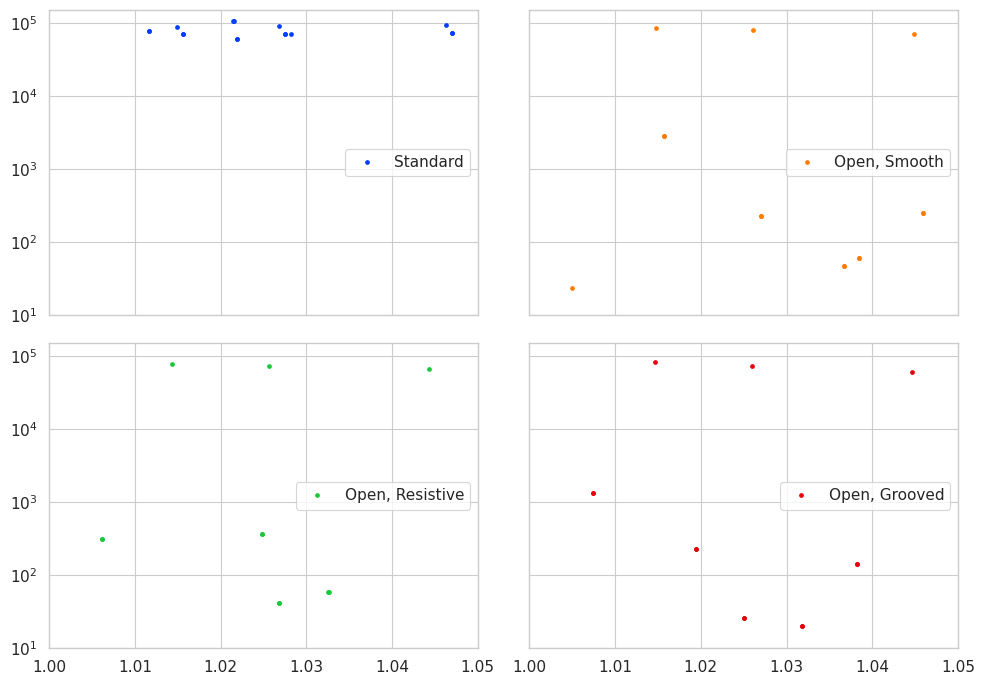

In [126]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(10,7), sharex=True,sharey=True)
axs = axs.flatten()
#ax = fig.add_subplot(1,1,1)

labels = ['Standard', 'Open, Smooth', 'Open, Resistive', 'Open, Grooved']
for i, path in enumerate(files):
    eigenmodes = parse_eig(path)
    axs[i].plot(
        eigenmodes[:,0],
        eigenmodes[:,1],
        color=clist[i],
        ls='none',
        marker='.',
        label=labels[i]
    )
    
    axs[i].set_ylim(10,1.5e5)
    axs[i].set_yscale('log')
    axs[i].set_xlim(1,1.05)
    axs[i].legend(loc=5)
    
plt.tight_layout(pad=1.05)
plt.savefig(Path.home()/'group'/'project'/'plots'/'230610_cavity_variation_eigenmodes_log', dpi=150)

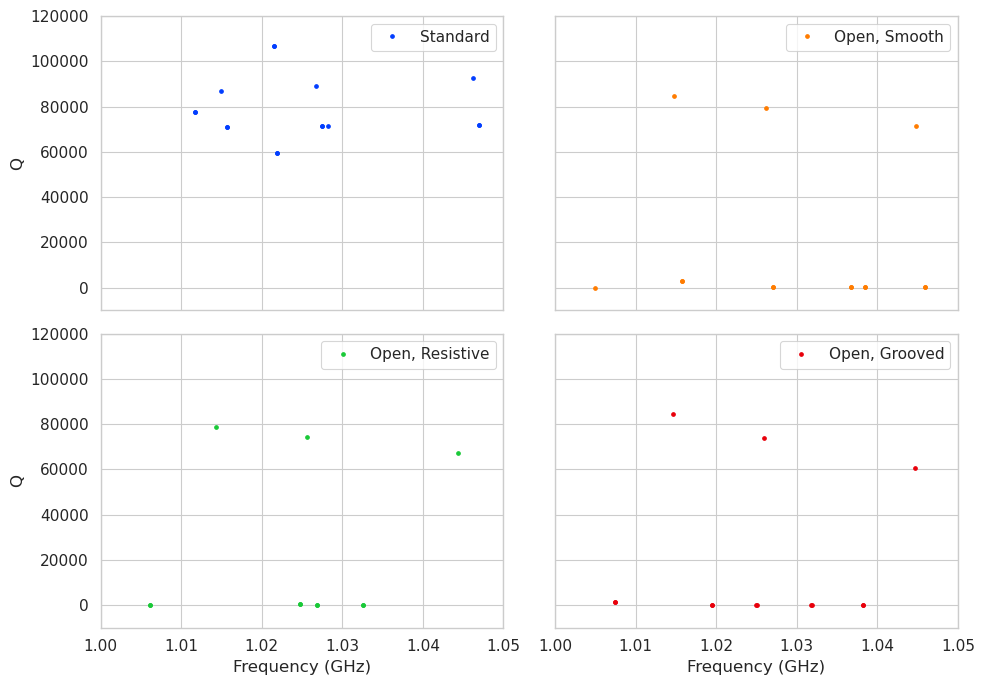

In [122]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(10,7), sharex=True,sharey=True)
axs = axs.flatten()
#ax = fig.add_subplot(1,1,1)

labels = ['Standard', 'Open, Smooth', 'Open, Resistive', 'Open, Grooved']

for i, path in enumerate(files):
    eigenmodes = parse_eig(path)
    axs[i].plot(
        eigenmodes[:,0],
        eigenmodes[:,1],
        color=clist[i],
        ls='none',
        marker='.',
        label=labels[i]
    )
    
    axs[i].set_ylim(-10000,1.2e5)
    axs[i].set_xlim(1,1.05)
    if i == 0 or i == 2:
        axs[i].set_ylabel('Q')
    if i == 2 or i == 3:
        axs[i].set_xlabel('Frequency (GHz)')
    #axs[i].set_yscale('log')
    axs[i].legend(loc=1)
    
plt.tight_layout(pad=1.05)
#plt.savefig(Path.home()/'group'/'project'/'plots'/'230610_cavity_variation_eigenmodes', dpi=150)